# ASSIGNMENT : EDA 02

___________________________________________________________________________________________________________

In [1]:
                                          # FLIGHT DATA SET

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
#we are loading the flight price data set by the help of pandas library.

import pandas as pd

df=pd.read_excel('flight_price.xlsx')


In [2]:
#For knowing the number and rows of a data set, we can simply use a function

df.shape



(10683, 11)

In [3]:
# we can simply see the output that, there are 10683 rows and 11 columns.

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

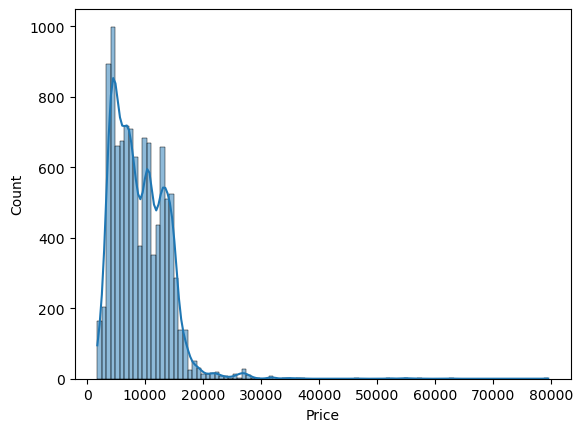

In [4]:
import seaborn as sns

sns.histplot(df['Price'],bins=100, kde=True)

# Observation

It can be clearly seen by anyone that the most of price data is in the range of 3000 to 16000. By the kde line we can predict that, the distribution of the data is seems like left skwed distribution.

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df['Price'].min()

1759

In [6]:
df['Price'].max()

79512

# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

<AxesSubplot: xlabel='Price', ylabel='Airline'>

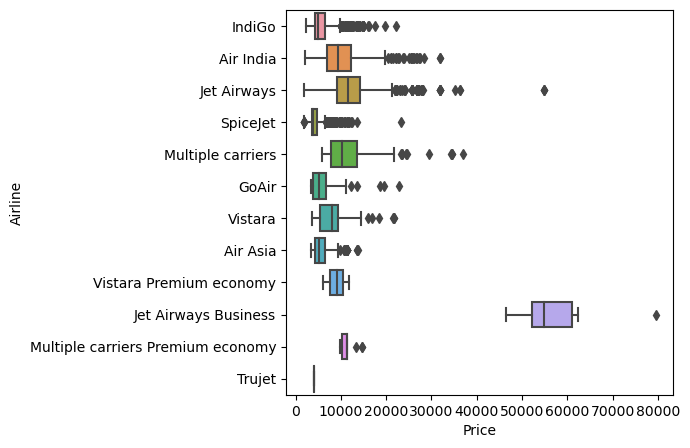

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.boxplot(df, x= 'Price', y='Airline')

# Observation

- we can see that jet Airways Business is the most expensive airline, even the most expensive flight price is 80000

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<AxesSubplot: >

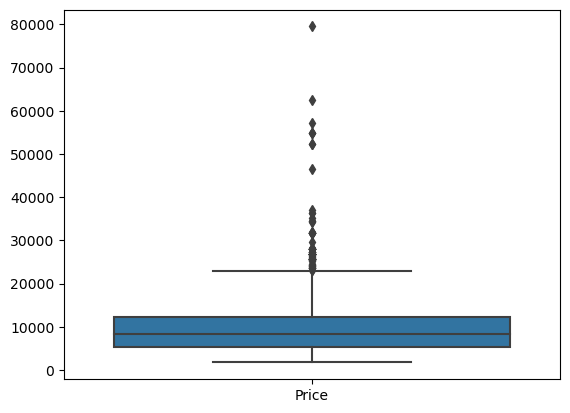

In [8]:
sns.boxplot(df)

# Observation

- The price above the boxplot's upper horizontal line are the outliers. The price value which is above approx 25000 is the outliers for this specific data set. 

- Outliers basically effect the mean value of tha data. It gives the false information about the data by which our model accuracy will be effected. In the case of outliers we use the median instead of mean as well as we can remove the outliers by certain opreations.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [9]:
# for identifying the peak travel season we have to make over data model friendly. so that we have to encode the Date of jaurney as the 
# model could not understad in this format.

df['Day_of_Journey']=df['Date_of_Journey'].str.split('/').str[0]
df['month_of_Journey']=df['Date_of_Journey'].str.split('/').str[1]
df['year_of_Journey']=df['Date_of_Journey'].str.split('/').str[2]

<AxesSubplot: xlabel='month_of_Journey', ylabel='Count'>

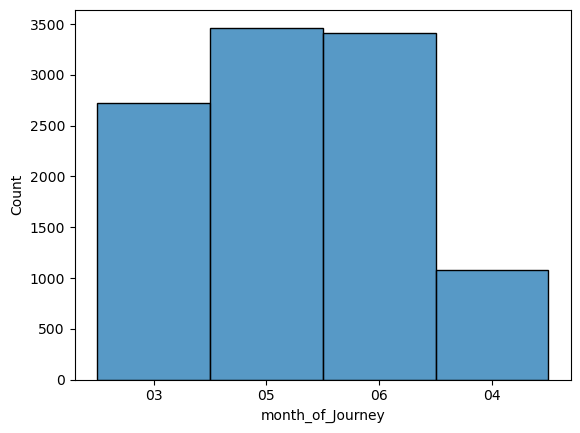

In [10]:
df1=df.drop('Date_of_Journey', axis=1)

import seaborn as sns


sns.histplot(df, x='month_of_Journey')


# Observaton

In the observation it is clear that, in 5th and 6th moths people are travling in bulk of the numbers. So the peak travel season is 5th and 6th months

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

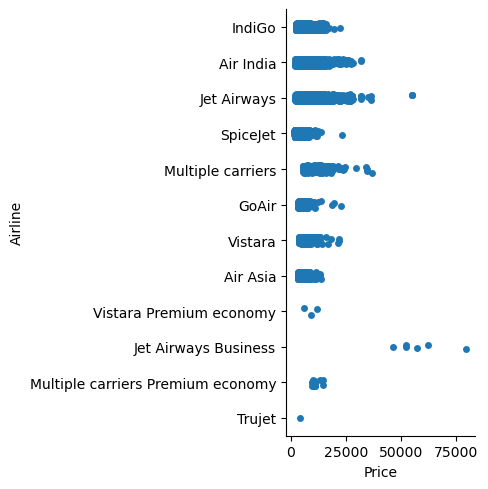

In [10]:
import seaborn as sns
sns.catplot( x= df['Price']  , y= df['Airline'] )

Observation

- in above abservation , it is showing that how the price of plan differ by company to company. Jet Airways Bussiness is most expensive plan in this list

In [47]:
df['Total_Stops']= df['Total_Stops'].str.replace( 'non-stop' , '0')
df['Total_Stops']= df['Total_Stops'].str.replace( 'stop' , '')
df['Total_Stops']= df['Total_Stops'].str.replace( 's' , '')

In [45]:
df=df.dropna()

In [48]:
df['Total_Stops']=df['Total_Stops'].astype(int)

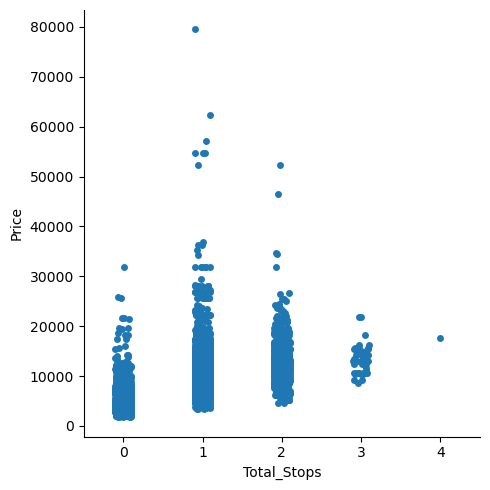

In [62]:
import matplotlib.pyplot as plt
sns.catplot( x= df['Total_Stops'] , y = df['Price']   )


Observatiom:

- as the number of stop is incresing the price of the plan is decreasing

In [4]:
# here we want to examine the realtioon between duration and price
#for that we convert time in proper formate

df['Duration']= pd.to_timedelta(df['Duration'])

In [5]:
seconds= df['Duration'].dt.seconds

In [6]:
df['Duration_Minutes']= seconds/60

In [128]:
df=df['Duration_Minutes'].astype(float)

<AxesSubplot: >

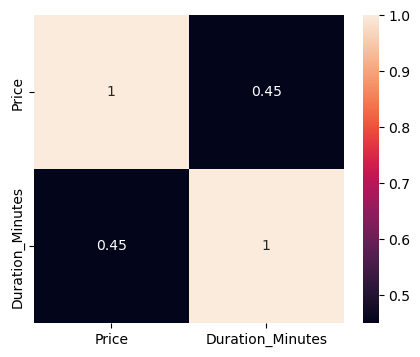

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(1, figsize=(5,4))
plt.subplot(111)
corr= df[['Price' , 'Duration_Minutes' ] ].corr()

sns.heatmap(corr , annot=True)



Observation

- Heatmap shows the propostional connection betweent the price and duration a plan. It means when the duratiion of journey is long the price will also incresing. 

# GOOGLE PLAY STORE DATA SET

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
# loading the Play store data set by the help of url

import pandas as pd

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')




In [4]:
# to check the number of rows and columns, we are using a function

df.shape

(10841, 13)

In [5]:
# This function shows that there are 13 columns a 10841 rows in the whole data set

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

<AxesSubplot: xlabel='Rating', ylabel='Category'>

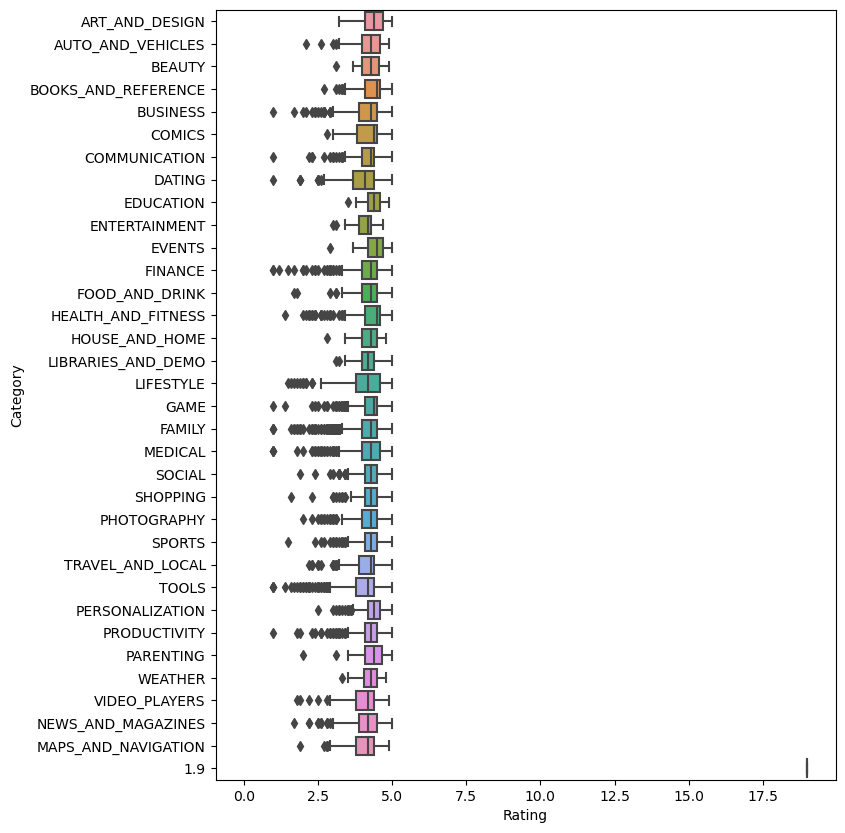

In [6]:
df['Rating'].info # shows that column in float formate we did'nt any need for modification

# Now we check how many unique values are there, in the app categories

df['Category'].value_counts()

# so there are numeries unique values and their frequency of appearing are shown in consel, which 
#takes us up to take the decision for analysis..ie..boxplot


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(121,  figsize=(8,10))
plt.plot(121)
sns.boxplot(df, x= 'Rating' , y= 'Category')

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Above function clearly shows that, there are numeries missing values in the data set, specially in 'Rating' column there are the 1474 missing or null values.
and some in the other columns.This is how, we idenitify the missing values from the data set. But the quation is how  these values are impact our analysis?
The null values are basically dengoures for the accuracy of the meachene learining model. It giving the false inforamtion about the mean of the values. If that specific null values are resembled to any other value than it also effect that value also.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: New_Size
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


<AxesSubplot: xlabel='New_Size', ylabel='Rating'>

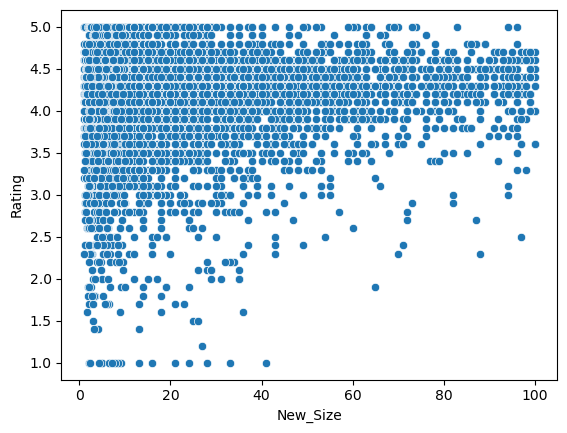

In [29]:
# To perform such opreation, firstly we have to change the columns 'SIZE' value into float. For that we have to remove 'M' from each valu

df['New_Size']= df['Size'].str.replace("M", "")

# after removing the "M" from data set we are going to check the data type of object.For performing further opreations it should me float.

df['New_Size'].info()

#oo..it shows that column New_Size has a object type of data. 

# So we have to convert it in float formate. For doing this we are using pandas function.

df['New_Size'] = pd.to_numeric(df['New_Size'], errors='coerce')

#Now the values data type will be changed. and we can remove` the orignal 'size' column as it is useless.

df.drop('Size' , axis = 1 )



# so this is just feature engineering ...the cleaning if the data. Now we perform our real task. 
# showing the realtion between size of the app and its rating in scatter plot. we use seaborn for this.

import seaborn as sns
sns.scatterplot(df, x = 'New_Size' , y= 'Rating')

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
df['Price']= df['Price'].str.replace( '$' , '')


In [66]:
df=df.loc[df['Price'] != 'Everyone' ]

In [67]:
df['Price']= df['Price'].astype(float)

<AxesSubplot: xlabel='Price', ylabel='Count'>

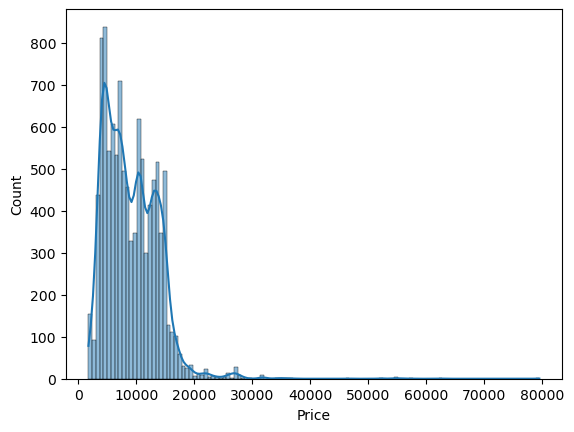

In [20]:
sns.histplot(df['Price'] , kde = True)

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the app with the highest number of installs.

In [202]:
# firstly we need to clean the data 

# as we can see that in the installs section there is + sign, so here we need to remove that

df['Installs']=df['Installs'].str.replace( "+" , "")


In [133]:
df['Installs']=df['Installs'].str.replace(",", "")

In [182]:
df['Installs']=df['Installs'].astype(int)

In [183]:
sorted(df['Installs'] , reverse= True)[:10]

[1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000]

In [193]:
 df.query('Installs ==500000000' )['App' ]


342                                       Viber Messenger
347                         imo free video calls and chat
371                 Google Duo - High Quality Video Calls
378           UC Browser - Fast Download Private & Secure
383                         imo free video calls and chat
                              ...                        
4365                                            MX Player
4566                           SHAREit - Transfer & Share
4676                                      Viber Messenger
5596                                       Samsung Health
7536    Security Master - Antivirus, VPN, AppLock, Boo...
Name: App, Length: 72, dtype: object